In [8]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, io, filters, util, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import img_as_ubyte
from sklearn.metrics import accuracy_score
from tensorflow import keras 
from tensorflow.keras.optimizers import RMSprop

import os


0


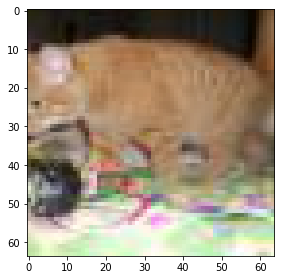

In [9]:
with h5py.File('c-d-ds-small.hdf5', 'r') as f:
#with h5py.File('c-d-ds.hdf5', 'r') as f:
    X_train_org = f['X_train'][:,:,:,:]
    y_train_org = f['y_train'][:]
    X_test_org =  f['X_test'][:,:,:,:]
    y_test_org =  f['y_test'][:]

io.imshow(X_train_org[69,:,:,:])    
print(y_train_org[69])


In [10]:
X_train = X_train_org / 256
y_train = y_train_org

X_test = X_test_org / 256
y_test = y_test_org

X_train.shape , y_train.shape, X_test.shape, y_test.shape

((1000, 64, 64, 3), (1000,), (200, 64, 64, 3), (200,))

In [16]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64,64,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(8, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.002), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train, epochs=15, verbose=1)

Epoch 1/15
32/32 [==============================] - 54s 2s/step - loss: 0.8072 - acc: 0.5150
Epoch 2/15
32/32 [==============================] - 54s 2s/step - loss: 0.6902 - acc: 0.5440
Epoch 3/15
32/32 [==============================] - 41s 1s/step - loss: 0.6912 - acc: 0.5770
Epoch 4/15
32/32 [==============================] - 38s 1s/step - loss: 0.6673 - acc: 0.5880
Epoch 5/15
32/32 [==============================] - 38s 1s/step - loss: 0.6773 - acc: 0.6160
Epoch 6/15
 3/32 [=>............................] - ETA: 24s - loss: 0.6368 - acc: 0.6875

In [15]:
y_hat = model.predict(X_test) 
y_hat = np.round(y_hat)
accuracy_score(y_test, y_hat)

0.52